## circle abstraction for chemical structure graphs
In this notebook I show how to use Graphlearn with abstract graphs to generate molecules with an abstraction 
that deals with circular motives.

### initialising

In [1]:
%load_ext autoreload
%autoreload 2
from eden.util import configure_logging
import logging
debug=True

configure_logging(logging.getLogger(),verbosity=1+debug)
%matplotlib inline

### get_graphs will provide data( networkx graphs )

In [2]:
from eden.converter.graph.gspan import gspan_to_eden
from itertools import islice

def get_graphs(dataset_fname='../toolsdata/bursi.pos.gspan', size=100):
    return  islice(gspan_to_eden(dataset_fname),size)

## I demonstrate what an abstract graph looks like 


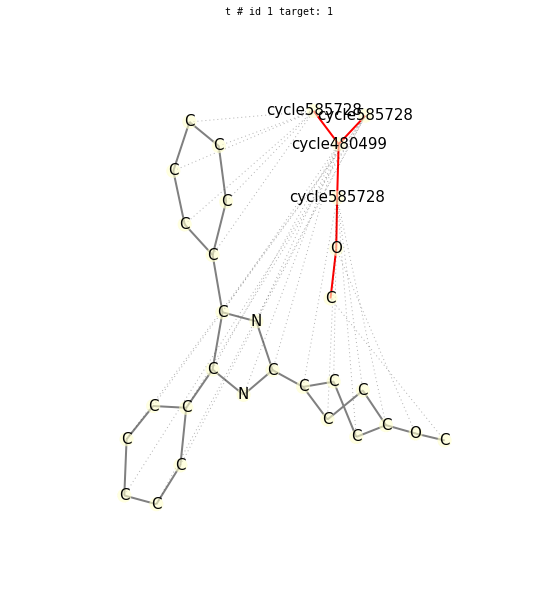

In [7]:
from graphlearn.utils import draw
import graphlearn.abstract_graphs.mole.circletransform as mole
import graphlearn.abstract_graphs.minordecompose as decompose
from graphlearn.graphlearn import Sampler as GLS
from eden.graph import Vectorizer

# get a graph and prepare it
graphs=get_graphs()
g=graphs.next()
g=vectorizer._graph_preprocessing(g)
make_decomposer = lambda x,y: decompose.MinorDecomposer(x,y,
                       include_base=False,
                       base_thickness_list=[2])
#the preprocessor makes the abstraction, wrapper provides convenient format for drawing
preproc=mole.GraphTransformerCircles()
graph_wrapper=make_decomposer(preproc.vectorizer,preproc.wrap(g))
graph=graph_wrapper.pre_vectorizer_graph(nested=True)


# draw 
draw.graphlearn(graph,size=10, abstract_color='red', contract=True,ignore_for_layout='nesting')

## Here we see different views on a graph, provided by the wrapper,

for the sampling process CIPs need to be extracted. 
here we see this mechanism. 

DEMONSTRATING WRAPPER
grammar example 0


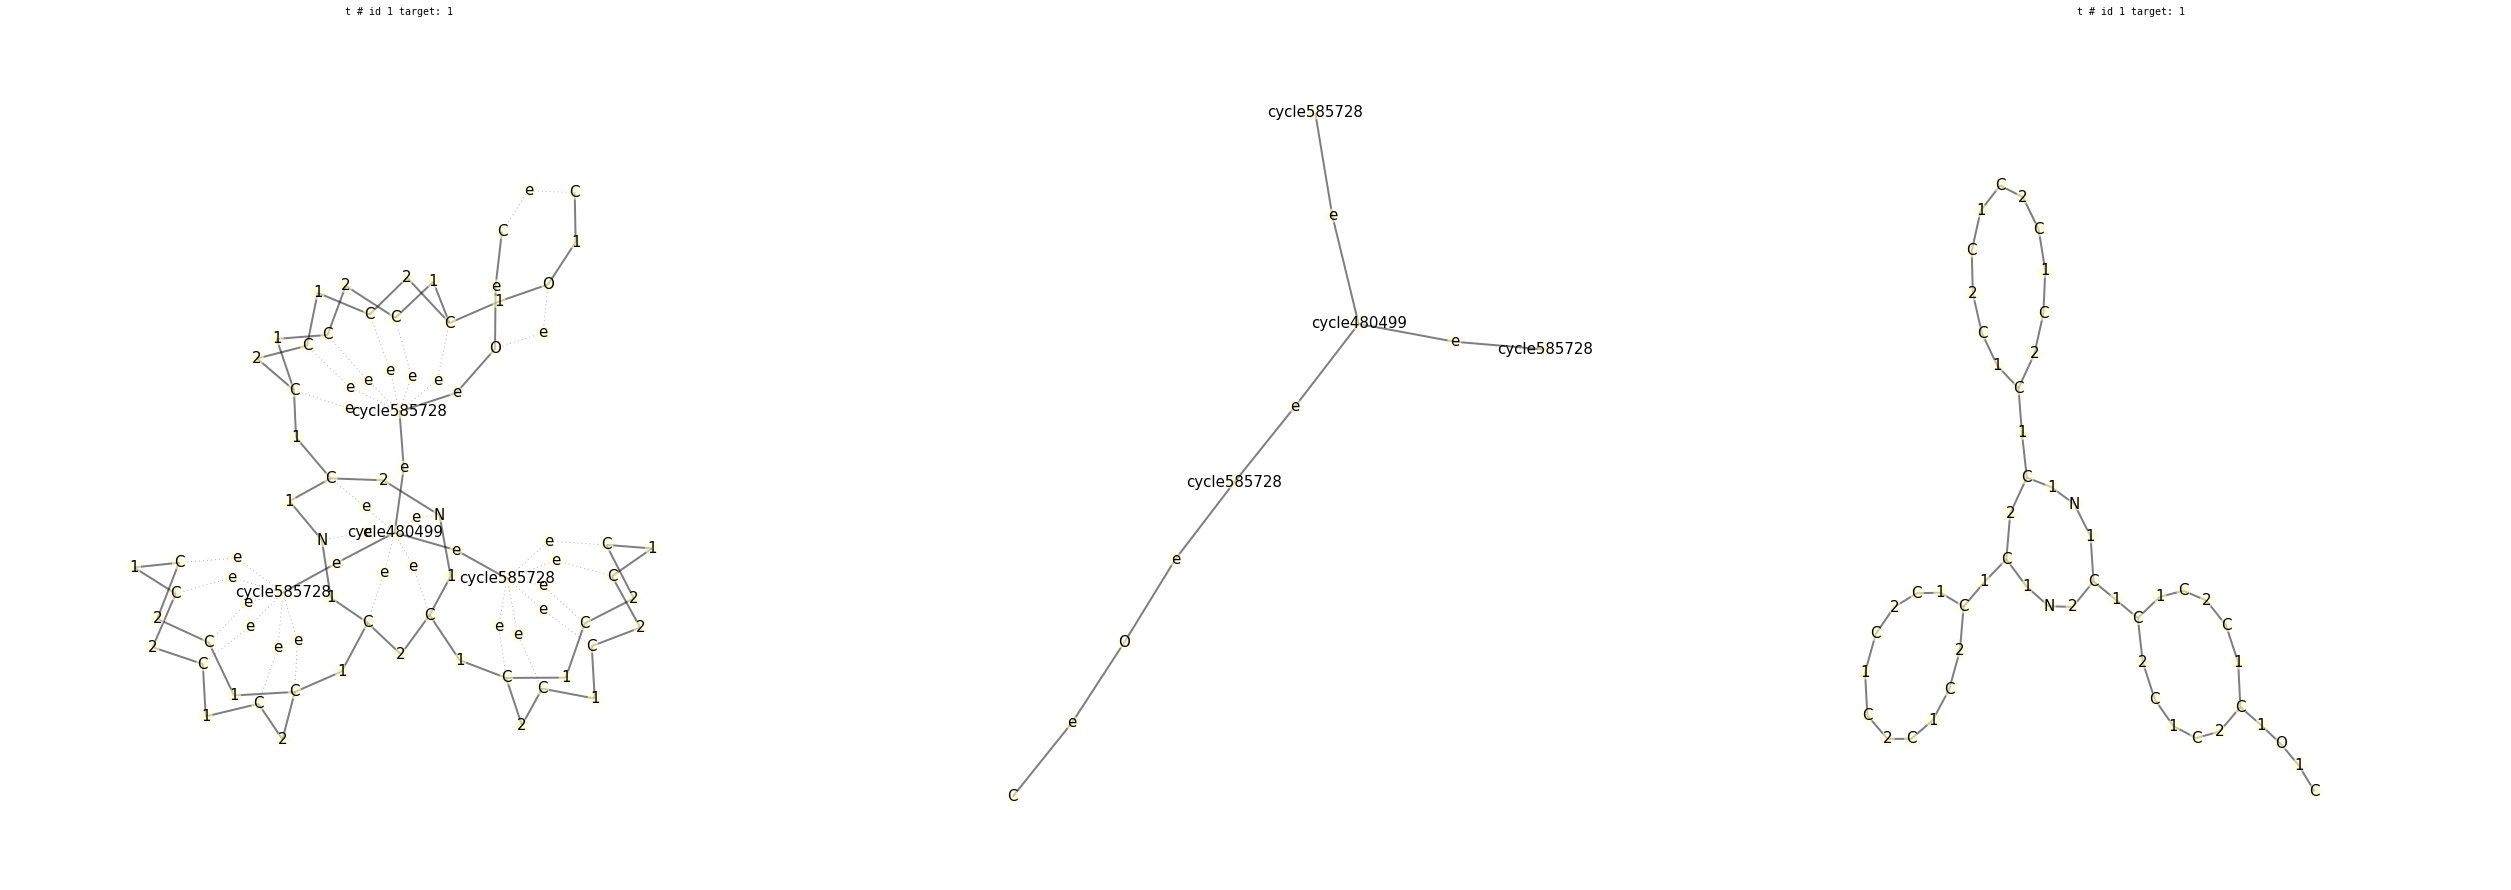

DEMONSTRATING EXTRACTION


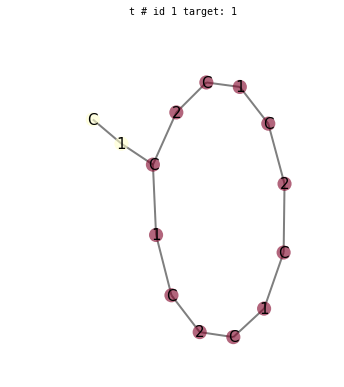

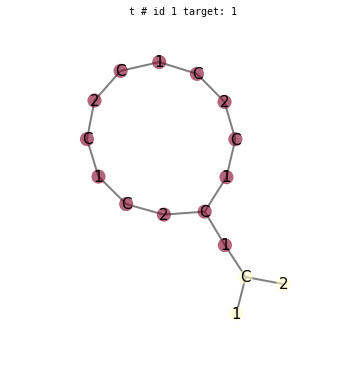

In [4]:
from graphlearn.utils import draw
from graphlearn.graphlearn import Sampler as GLS
from eden.graph import Vectorizer



print 'DEMONSTRATING WRAPPER'
graphs=get_graphs()
for i in range(1):
    print 'grammar example %d' % i
    g=graphs.next()
    gm=make_decomposer(vectorizer,preproc.wrap(g))
    draw.graphlearn([gm.pre_vectorizer_graph(nested=True),gm.abstract_graph(),gm.base_graph()], 
                    size = 15,
                    vertex_label = 'label',
                    contract=False)

    
print 'DEMONSTRATING EXTRACTION'  
radius_list=[0,2]
thickness_list=[2,4]
base_thickness_list=[2]
argz=(gm,radius_list,thickness_list,Vectorizer(),2**20-1,lambda x,y:True, base_thickness_list)

cips=gm.all_core_interface_pairs(thickness_list=[2],radius_list=[0,1],hash_bitmask=2**20-1)
draw.graphlearn(cips[0][0].graph, contract=False)
draw.graphlearn(cips[0][1].graph, contract=False)

## here we prepare a sampler and then take a closer look at the generated grammar.


In [21]:
%%time
from graphlearn.graphlearn import Sampler as GLS
graphs = get_graphs(size=200)
sampler=GLS(radius_list=[0,1],
            thickness_list=[1], 
            min_cip_count=2, 
            min_interface_count=2, 
            decomposer=make_decomposer,
            graphtransformer=mole.GraphTransformerCircles())
sampler.fit(graphs,grammar_n_jobs=1,grammar_batch_size=1)

#instances: 200  #interfaces: 51   #cores: 73   #core-interface-pairs: 226
CPU times: user 6.36 s, sys: 16 ms, total: 6.38 s
Wall time: 6.37 s


interface id: 553552 [23 options]


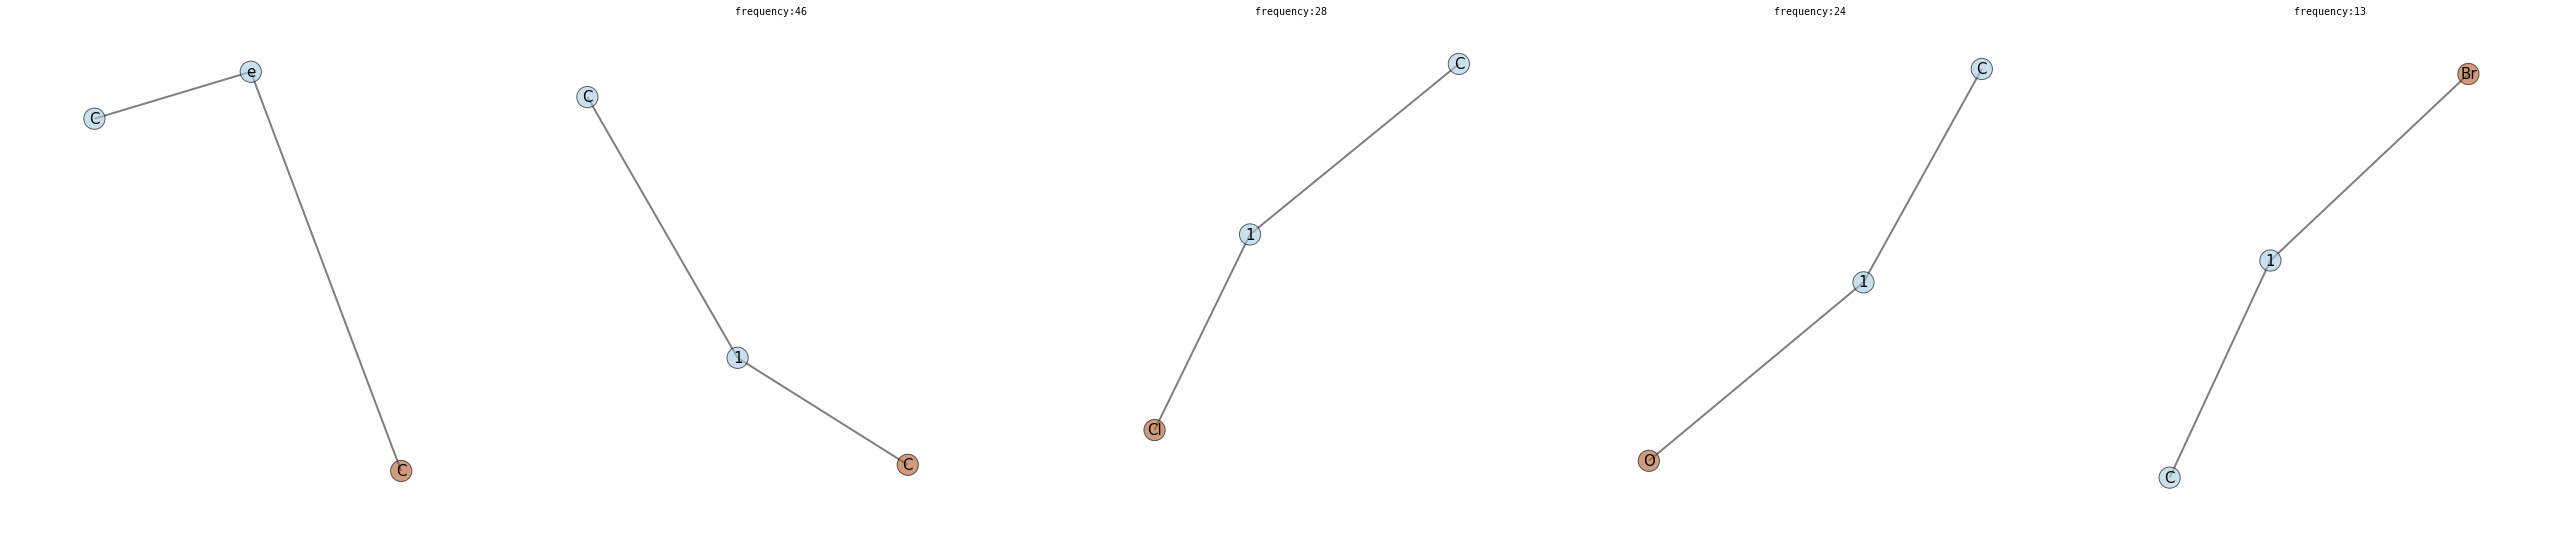

interface id: 646356 [16 options]


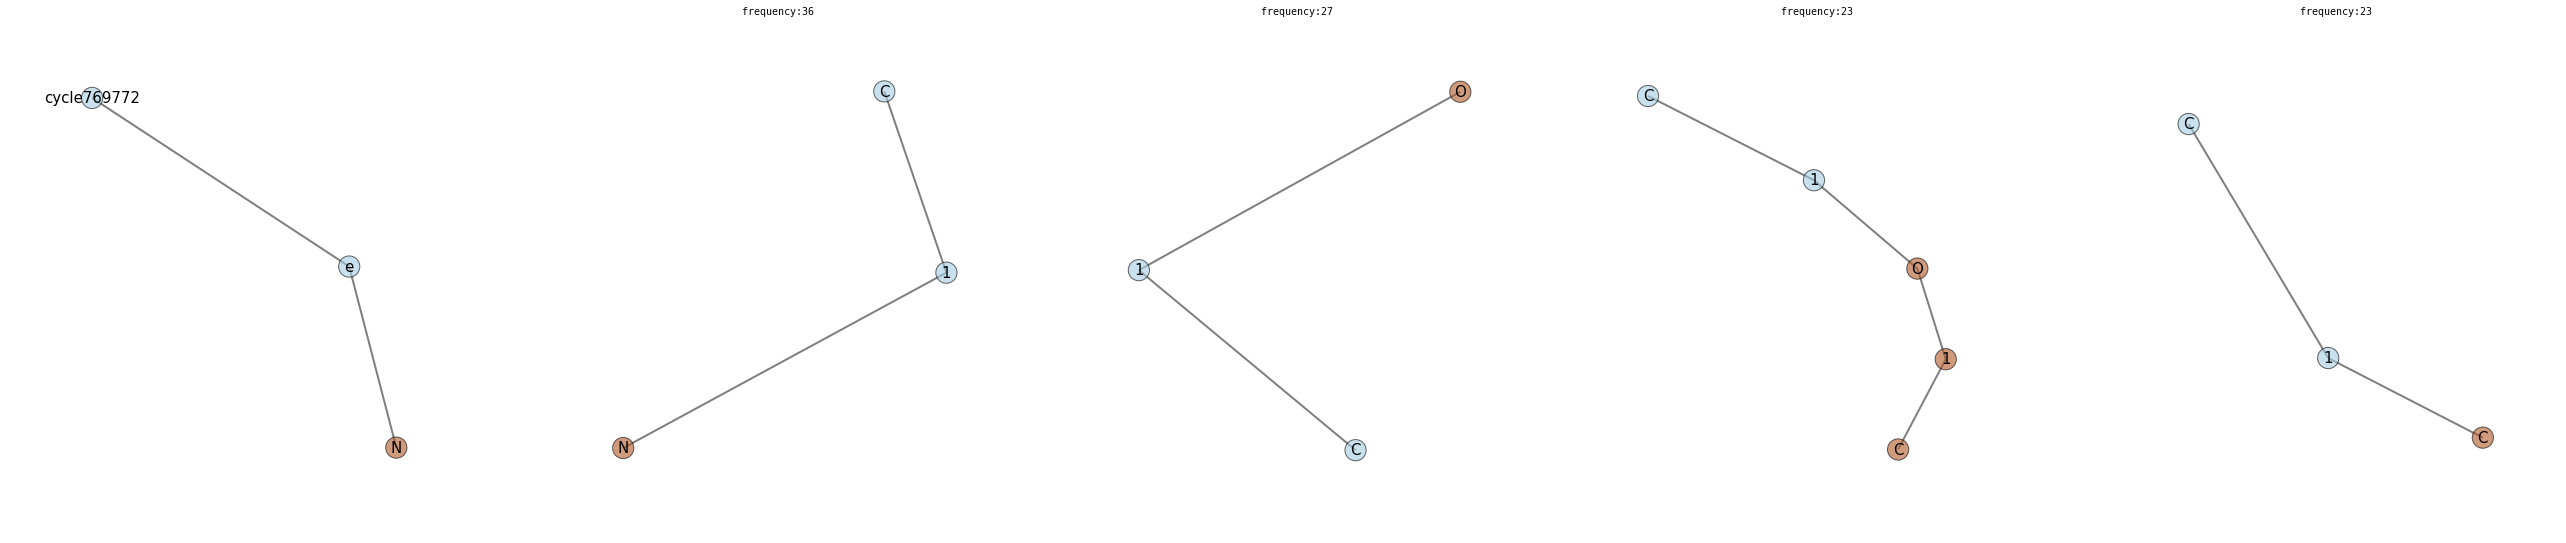

interface id: 735458 [15 options]


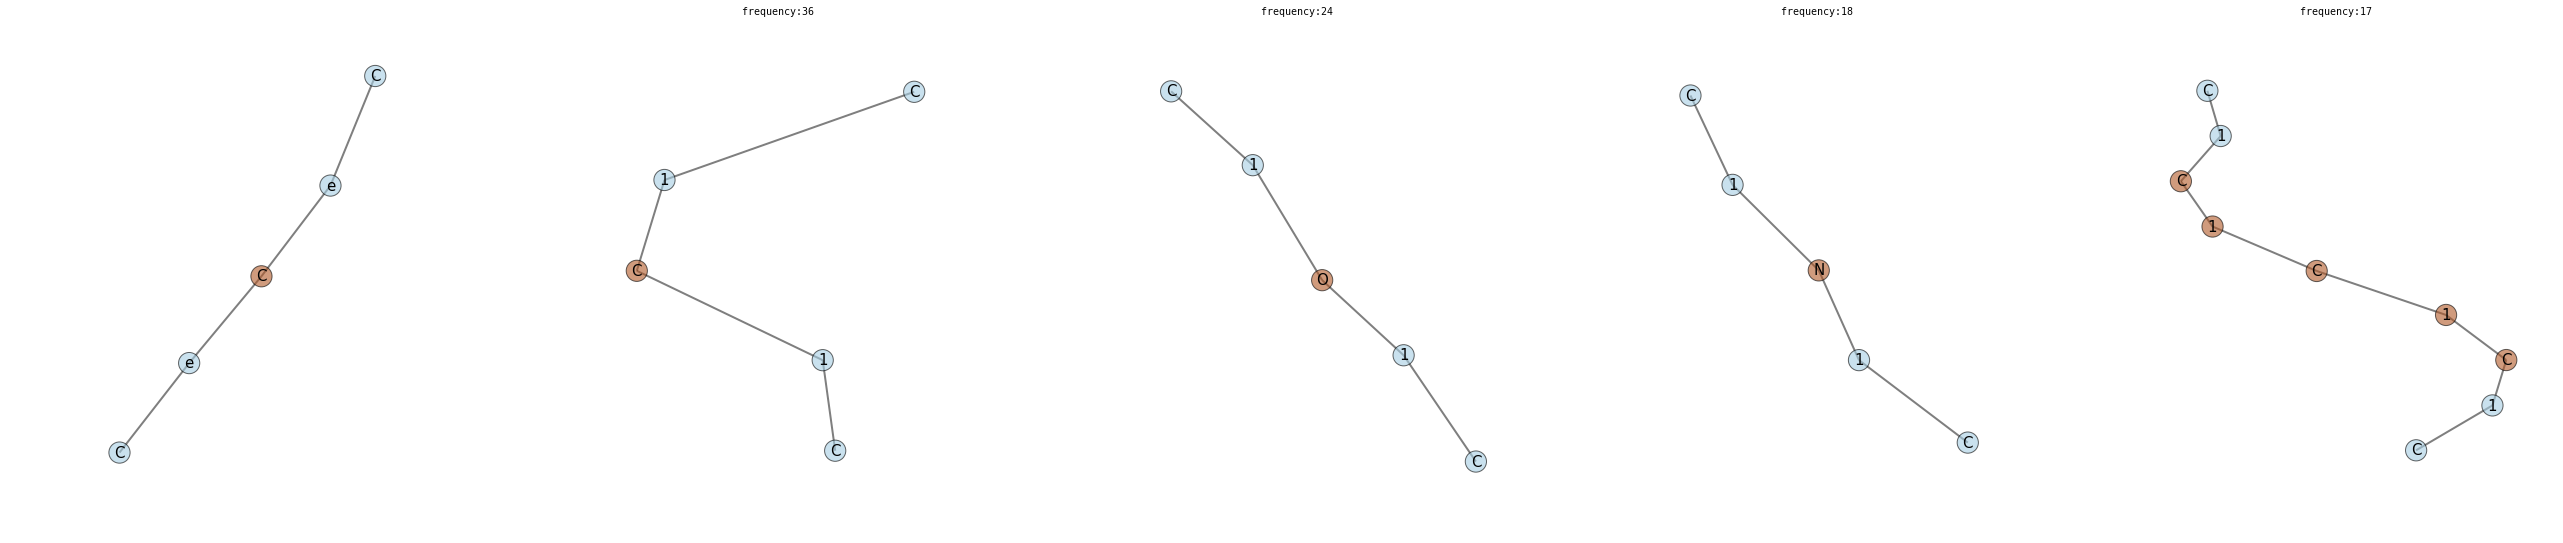

interface id: 151696 [15 options]


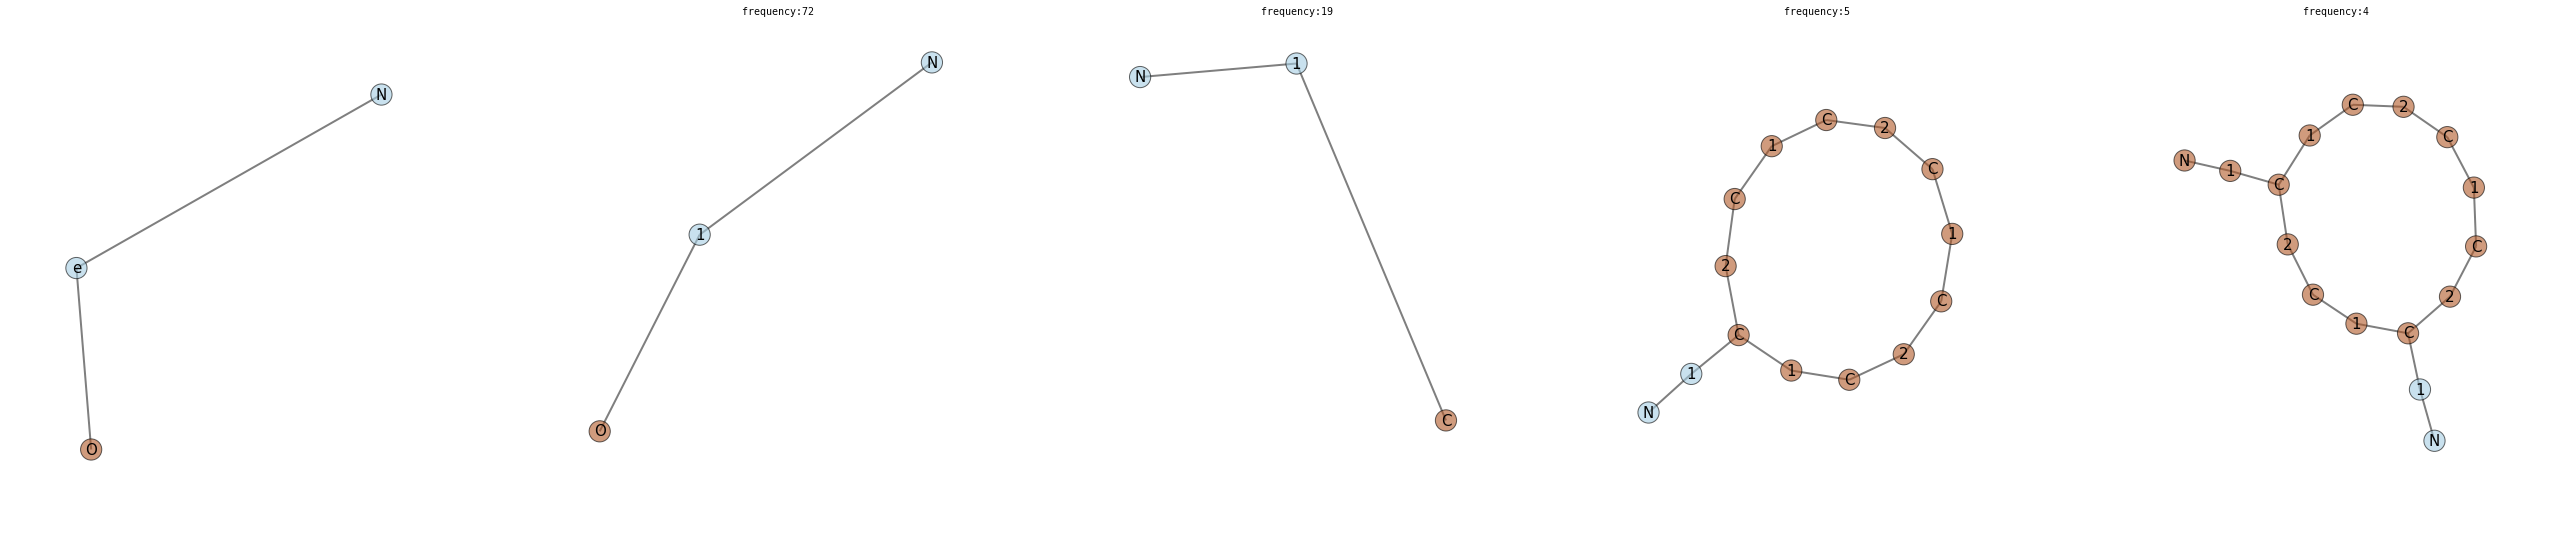

interface id: 538594 [14 options]


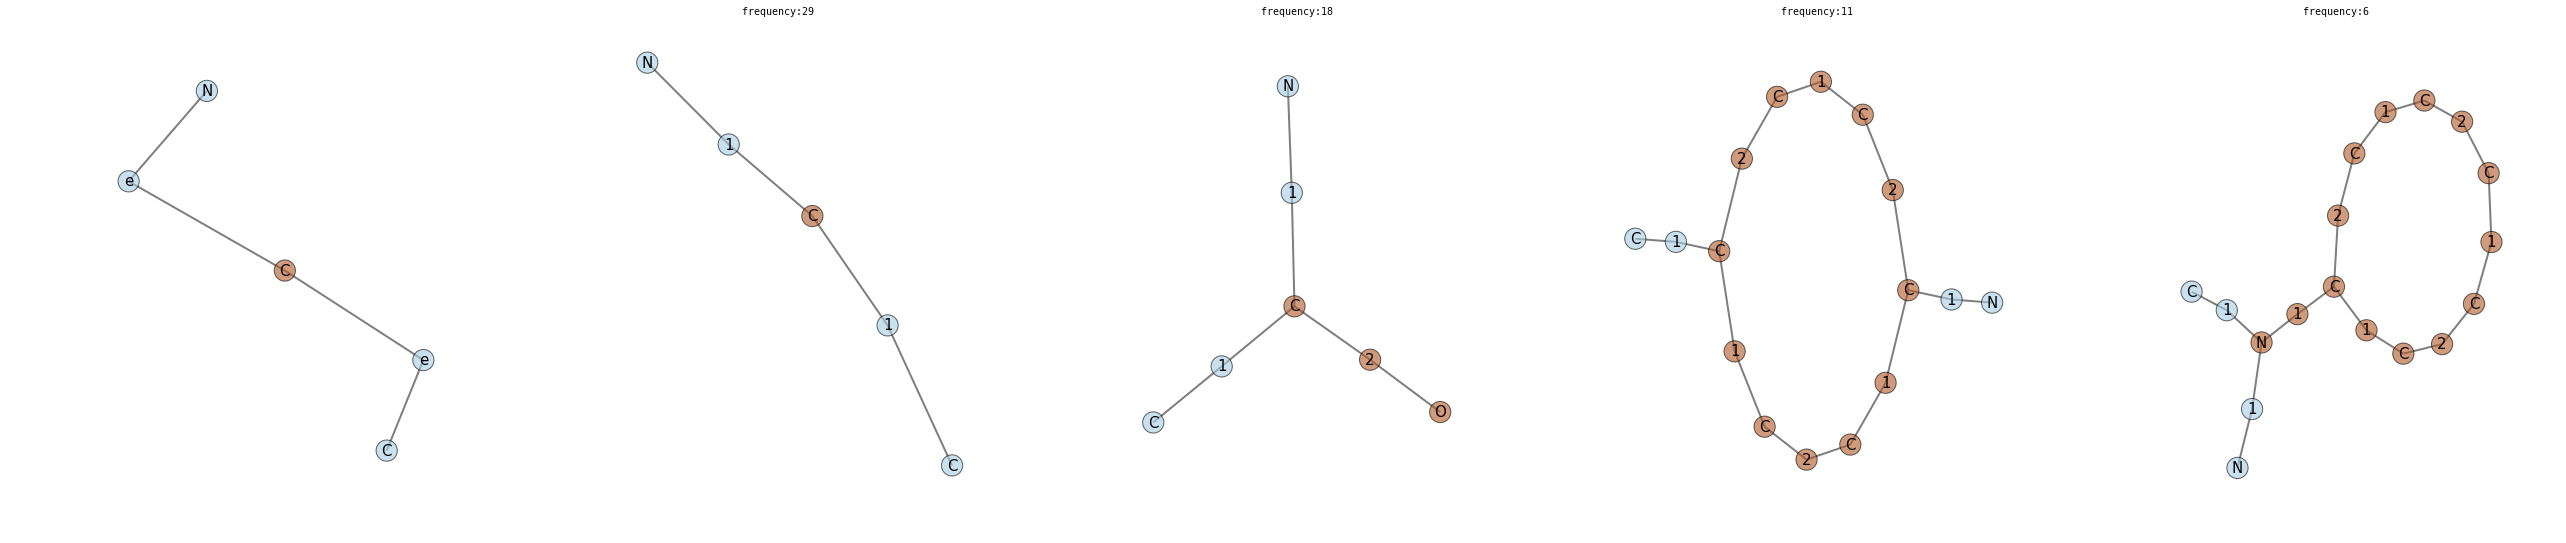

In [22]:
#show congruent cips in grammar
draw.draw_grammar(sampler.lsgg.productions,n_productions=5,n_graphs_per_production=5,
                     n_graphs_per_line=5, size=9, contract=False,
                     colormap='Paired', invert_colormap=False,node_border=1,
                     vertex_alpha=0.6, edge_alpha=0.5, node_size=450, abstract_interface=True)

## Molecule sampling

preprocessing grammar
adding core size lookup to lsgg
_sample_notes: None
accept_min_similarity: 0.0
accept_static_penalty: 0.0
batch_size: 1
    burnin: 0
decomposer_generator: <function <lambda> at 0x7f7ad8dcf050>
estimatorobject: <graphlearn.estimate.OneClassEstimator instance at 0x7f7adb8cbcf8>
feasibility_checker: <graphlearn.feasibility.FeasibilityChecker instance at 0x7f7adb8cbd40>
graphtransformer: <graphlearn.abstract_graphs.mole.circletransform.GraphTransformerCircles object at 0x7f7ad9352450>
hash_bitmask: 1048575
improving_linear_start: 0
improving_penalty_per_step: 0.02
improving_threshold: 50
include_seed: True
keep_duplicates: True
      lsgg: <graphlearn.localsubstitutablegraphgrammar.LocalSubstitutableGraphGrammar object at 0x7f7ad36d7990>
max_core_size_diff: 20
maxbacktrack: 0
   monitor: False
  monitors: []
    n_jobs: 1
   n_steps: 100
      nbit: 20
node_entity_check: <function <lambda> at 0x7f7adb8d2320>
postprocessor: <graphlearn.transform.PostProcessor object a

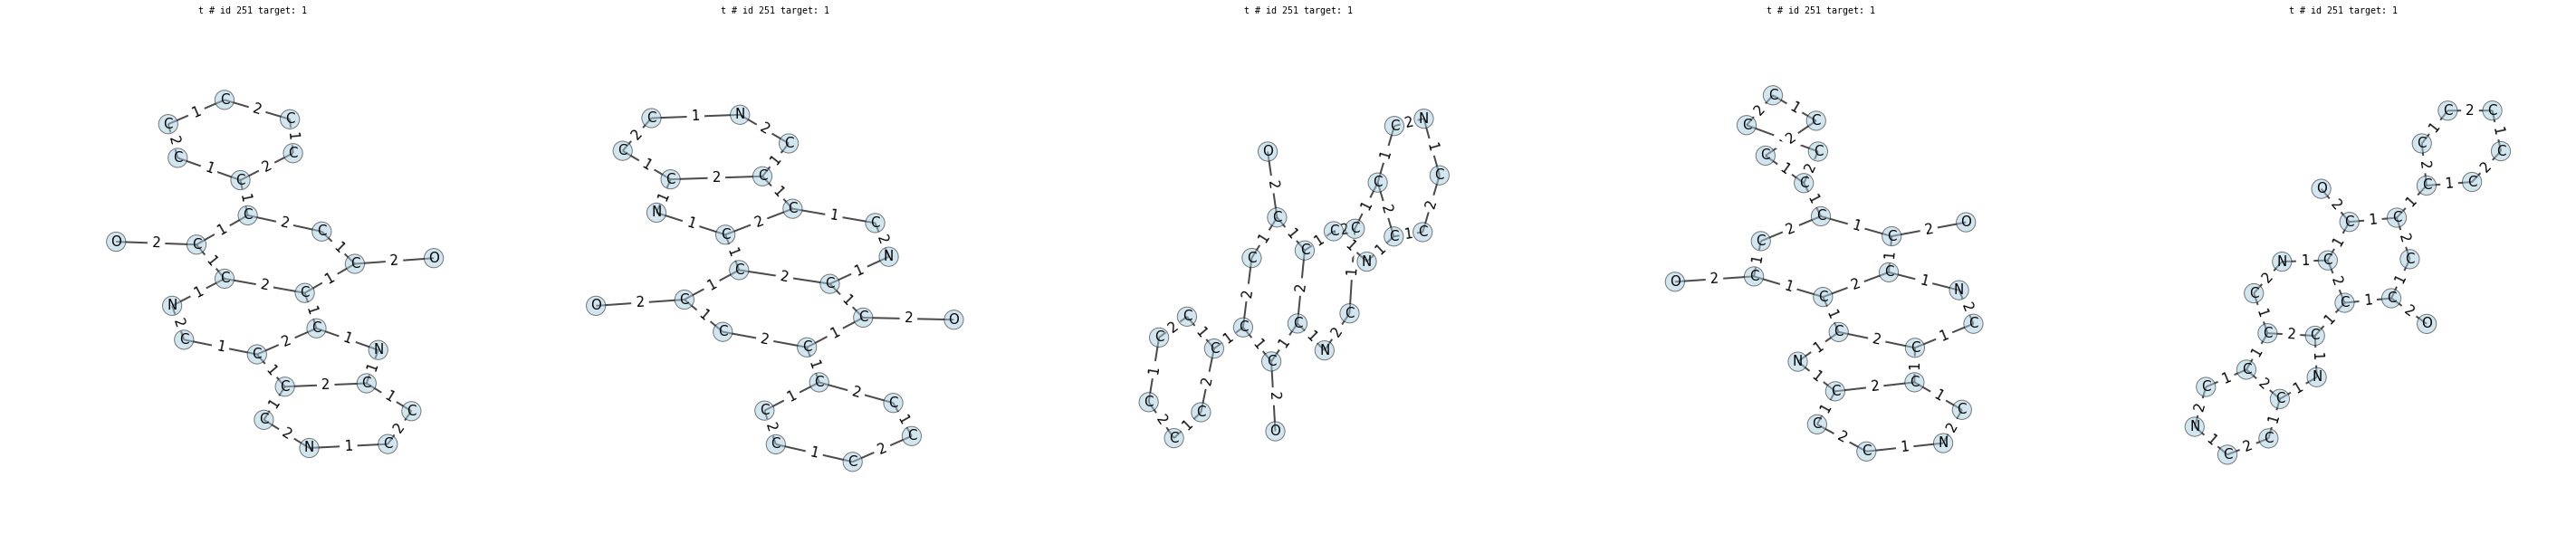

_propose_graph: iteration 0 ; core 0 of 1 ; original_cips tried  0 ; size 29
_propose_graph: iteration 1 ; core 0 of 1 ; original_cips tried  0 ; size 29
_propose_graph: iteration 2 ; core 0 of 1 ; original_cips tried  0 ; size 29
_propose_graph: iteration 3 ; core 0 of 1 ; original_cips tried  0 ; size 29
_propose_graph: iteration 4 ; core 0 of 1 ; original_cips tried  0 ; size 29
_propose_graph: iteration 5 ; core 0 of 1 ; original_cips tried  0 ; size 33
_propose_graph: iteration 6 ; core 0 of 1 ; original_cips tried  0 ; size 33
_propose_graph: iteration 7 ; core 0 of 1 ; original_cips tried  0 ; size 33
_propose_graph: iteration 8 ; core 0 of 1 ; original_cips tried  0 ; size 33
_propose_graph: iteration 9 ; core 0 of 1 ; original_cips tried  0 ; size 33
_propose_graph: iteration 10 ; core 0 of 1 ; original_cips tried  0 ; size 33
_propose_graph: iteration 11 ; core 0 of 1 ; original_cips tried  0 ; size 33
_propose_graph: iteration 12 ; core 0 of 1 ; original_cips tried  0 ; size

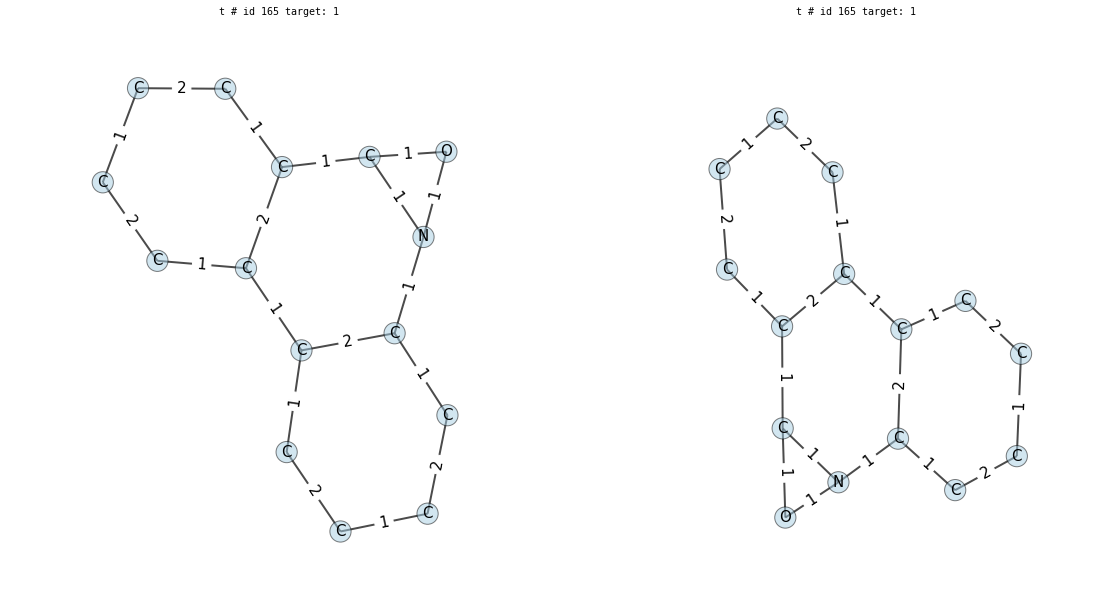

_propose_graph: iteration 0 ; core 0 of 15 ; original_cips tried  0 ; size 35
_propose_graph: iteration 1 ; core 0 of 2 ; original_cips tried  0 ; size 35
_propose_graph: iteration 2 ; core 0 of 15 ; original_cips tried  0 ; size 16
_propose_graph: iteration 3 ; core 0 of 15 ; original_cips tried  0 ; size 45
_propose_graph: iteration 4 ; core 0 of 6 ; original_cips tried  0 ; size 27
_propose_graph: iteration 5 ; core 0 of 5 ; original_cips tried  0 ; size 31
_propose_graph: iteration 6 ; core 0 of 14 ; original_cips tried  0 ; size 33
_propose_graph: iteration 7 ; core 0 of 6 ; original_cips tried  0 ; size 37
_propose_graph: iteration 8 ; core 0 of 15 ; original_cips tried  0 ; size 37
_propose_graph: iteration 9 ; core 0 of 15 ; original_cips tried  0 ; size 37
_propose_graph: iteration 10 ; core 0 of 13 ; original_cips tried  0 ; size 37
_propose_graph: iteration 11 ; core 0 of 13 ; original_cips tried  0 ; size 46
_propose_graph: iteration 12 ; core 0 of 1 ; original_cips tried  

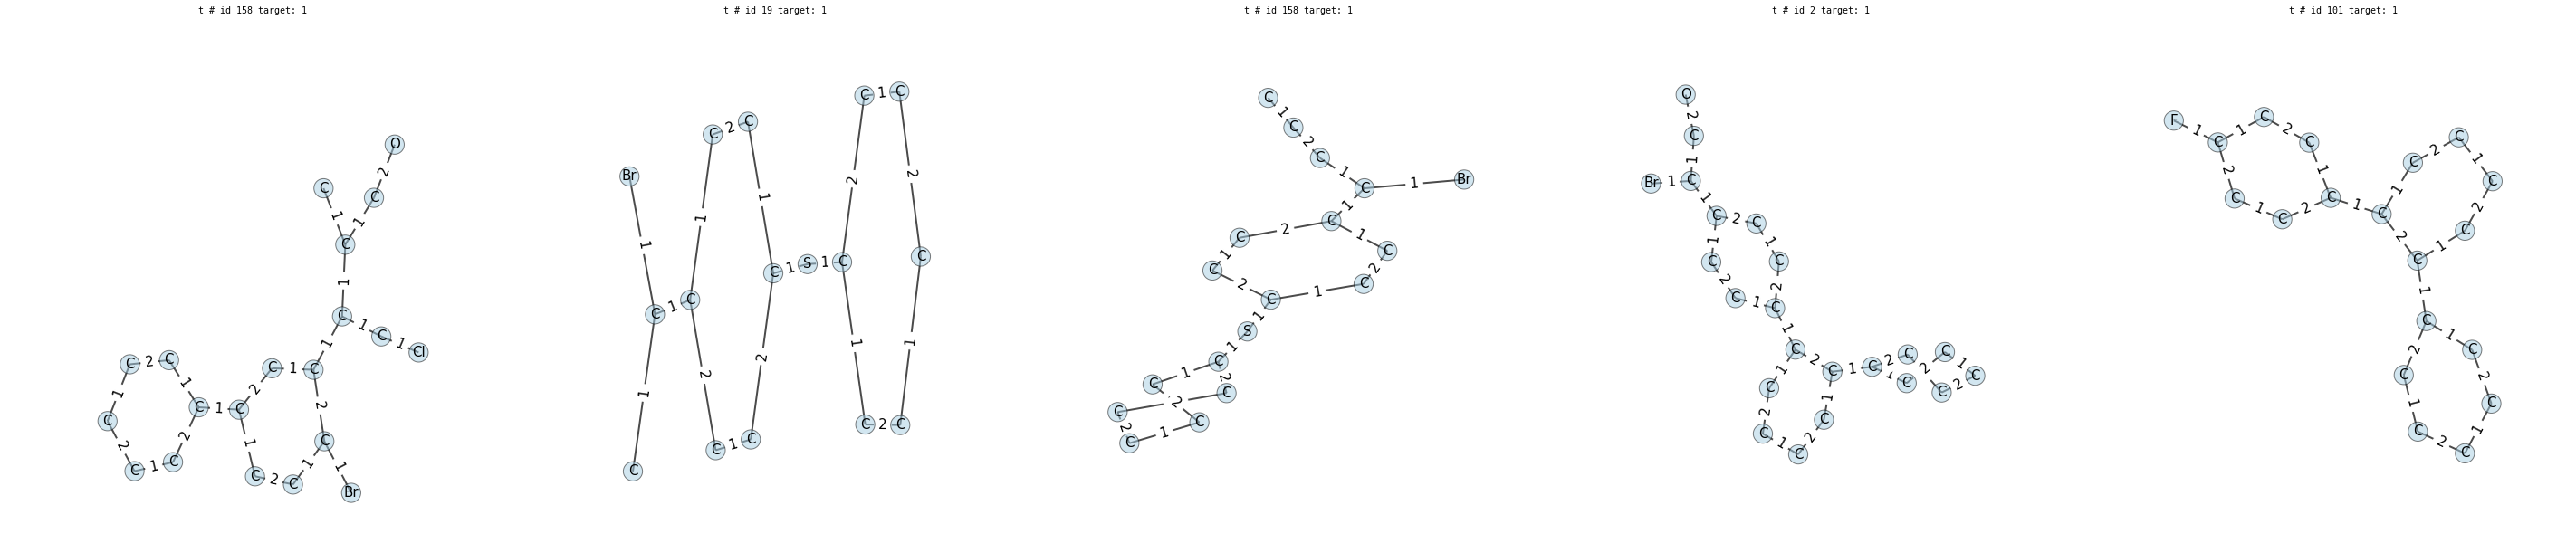

_propose_graph: iteration 0 ; core 0 of 15 ; original_cips tried  0 ; size 35
_propose_graph: iteration 1 ; core 0 of 1 ; original_cips tried  0 ; size 39
_propose_graph: iteration 2 ; core 0 of 13 ; original_cips tried  0 ; size 39
_propose_graph: iteration 3 ; core 0 of 1 ; original_cips tried  0 ; size 39
_propose_graph: iteration 4 ; core 0 of 15 ; original_cips tried  0 ; size 39
_propose_graph: iteration 5 ; core 0 of 2 ; original_cips tried  0 ; size 35
_propose_graph: iteration 6 ; core 0 of 14 ; original_cips tried  0 ; size 24
_propose_graph: iteration 7 ; core 0 of 14 ; original_cips tried  0 ; size 24
_propose_graph: iteration 8 ; core 0 of 3 ; original_cips tried  0 ; size 30
_propose_graph: iteration 9 ; core 0 of 15 ; original_cips tried  0 ; size 41
_propose_graph: iteration 10 ; core 0 of 15 ; original_cips tried  0 ; size 43
_propose_graph: iteration 11 ; core 0 of 22 ; original_cips tried  0 ; size 43
_propose_graph: iteration 12 ; core 0 of 15 ; original_cips tried 

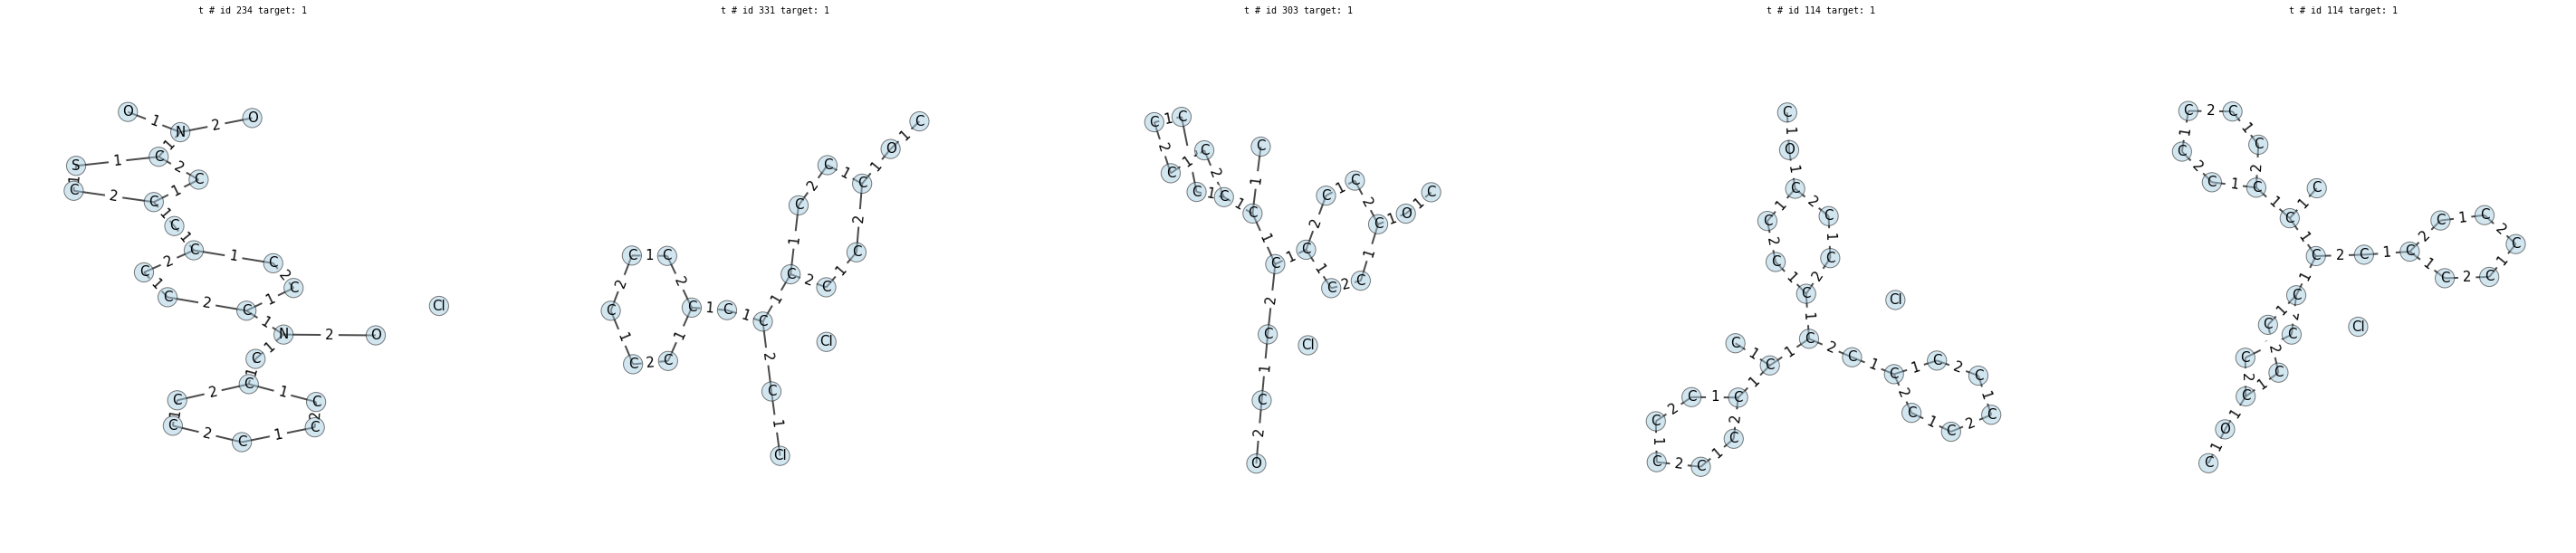

_propose_graph: iteration 0 ; core 0 of 2 ; original_cips tried  0 ; size 32
_propose_graph: iteration 1 ; core 0 of 2 ; original_cips tried  0 ; size 32
_propose_graph: iteration 2 ; core 0 of 2 ; original_cips tried  0 ; size 32
_propose_graph: iteration 3 ; core 0 of 15 ; original_cips tried  0 ; size 30
_propose_graph: iteration 4 ; core 0 of 15 ; original_cips tried  0 ; size 32
_propose_graph: iteration 5 ; core 0 of 22 ; original_cips tried  0 ; size 30
_propose_graph: iteration 6 ; core 0 of 3 ; original_cips tried  0 ; size 41
_propose_graph: iteration 7 ; core 0 of 3 ; original_cips tried  0 ; size 41
_propose_graph: iteration 8 ; core 0 of 3 ; original_cips tried  0 ; size 41
_propose_graph: iteration 9 ; core 0 of 15 ; original_cips tried  0 ; size 41
_propose_graph: iteration 10 ; core 0 of 3 ; original_cips tried  0 ; size 30
_propose_graph: iteration 11 ; core 0 of 22 ; original_cips tried  0 ; size 34
_propose_graph: iteration 12 ; core 0 of 13 ; original_cips tried  0 

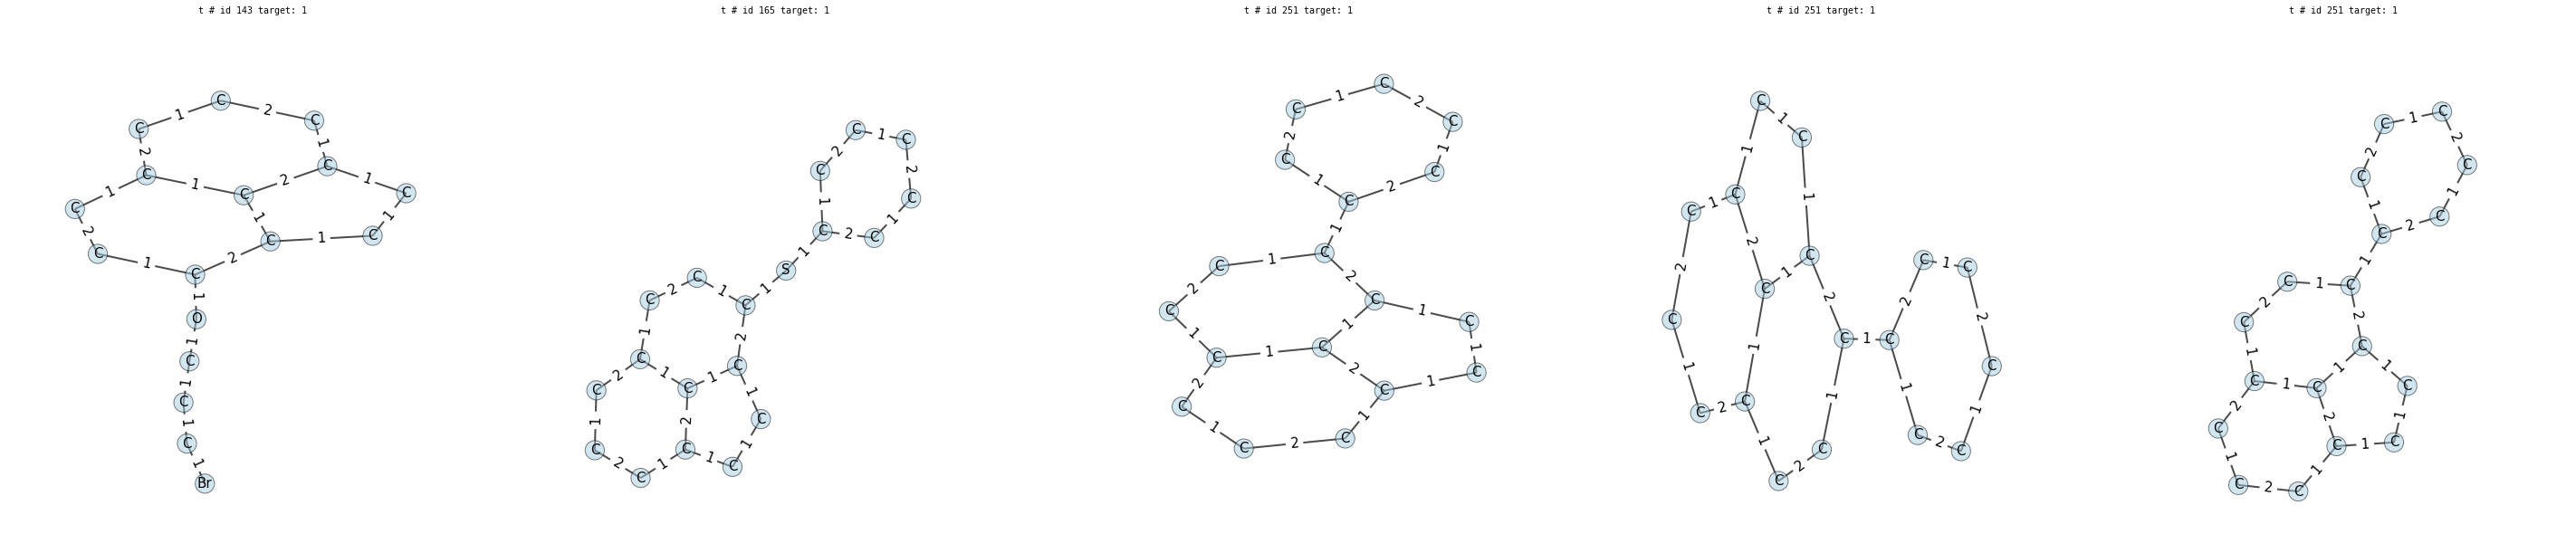

_propose_graph: iteration 0 ; core 0 of 15 ; original_cips tried  0 ; size 83
_propose_graph: iteration 1 ; core 0 of 2 ; original_cips tried  0 ; size 83
_propose_graph: iteration 2 ; core 0 of 3 ; original_cips tried  0 ; size 83
_propose_graph: iteration 3 ; core 0 of 15 ; original_cips tried  0 ; size 87
_propose_graph: iteration 4 ; core 0 of 22 ; original_cips tried  0 ; size 98
_propose_graph: iteration 5 ; core 0 of 22 ; original_cips tried  0 ; size 98
_propose_graph: iteration 6 ; core 0 of 4 ; original_cips tried  0 ; size 98
_propose_graph: iteration 7 ; core 0 of 4 ; original_cips tried  0 ; size 98
_propose_graph: iteration 8 ; core 0 of 15 ; original_cips tried  0 ; size 98
_propose_graph: iteration 9 ; core 0 of 22 ; original_cips tried  0 ; size 100
_propose_graph: iteration 10 ; core 0 of 1 ; original_cips tried  0 ; size 100
_propose_graph: iteration 11 ; core 0 of 1 ; original_cips tried  0 ; size 98
_propose_graph: iteration 12 ; core 0 of 2 ; original_cips tried  

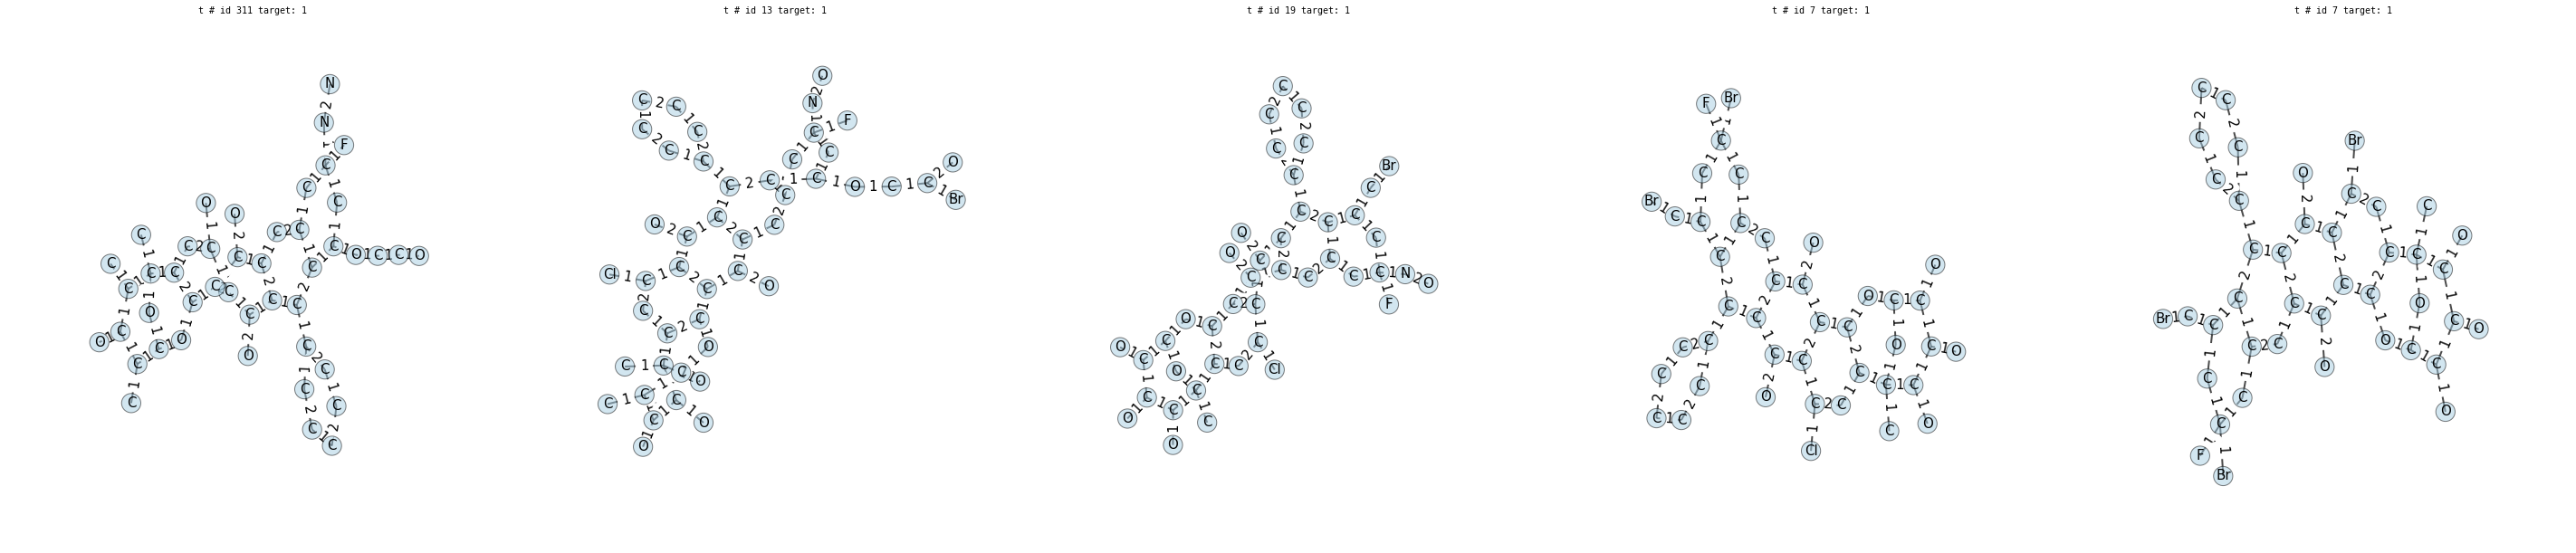

_propose_graph: iteration 0 ; core 0 of 2 ; original_cips tried  0 ; size 37
_propose_graph: iteration 1 ; core 0 of 15 ; original_cips tried  0 ; size 35
_propose_graph: iteration 2 ; core 0 of 22 ; original_cips tried  0 ; size 37
_propose_graph: iteration 3 ; core 0 of 2 ; original_cips tried  0 ; size 24
_propose_graph: iteration 4 ; core 0 of 2 ; original_cips tried  0 ; size 26
_propose_graph: iteration 5 ; core 0 of 22 ; original_cips tried  0 ; size 26
_propose_graph: iteration 6 ; core 0 of 1 ; original_cips tried  0 ; size 41
_propose_graph: iteration 7 ; core 0 of 22 ; original_cips tried  0 ; size 41
_propose_graph: iteration 8 ; core 0 of 2 ; original_cips tried  0 ; size 41
_propose_graph: iteration 9 ; core 0 of 14 ; original_cips tried  0 ; size 41
_propose_graph: iteration 10 ; core 0 of 14 ; original_cips tried  0 ; size 45
_propose_graph: iteration 11 ; core 0 of 13 ; original_cips tried  0 ; size 45
_propose_graph: iteration 12 ; core 0 of 13 ; original_cips tried  

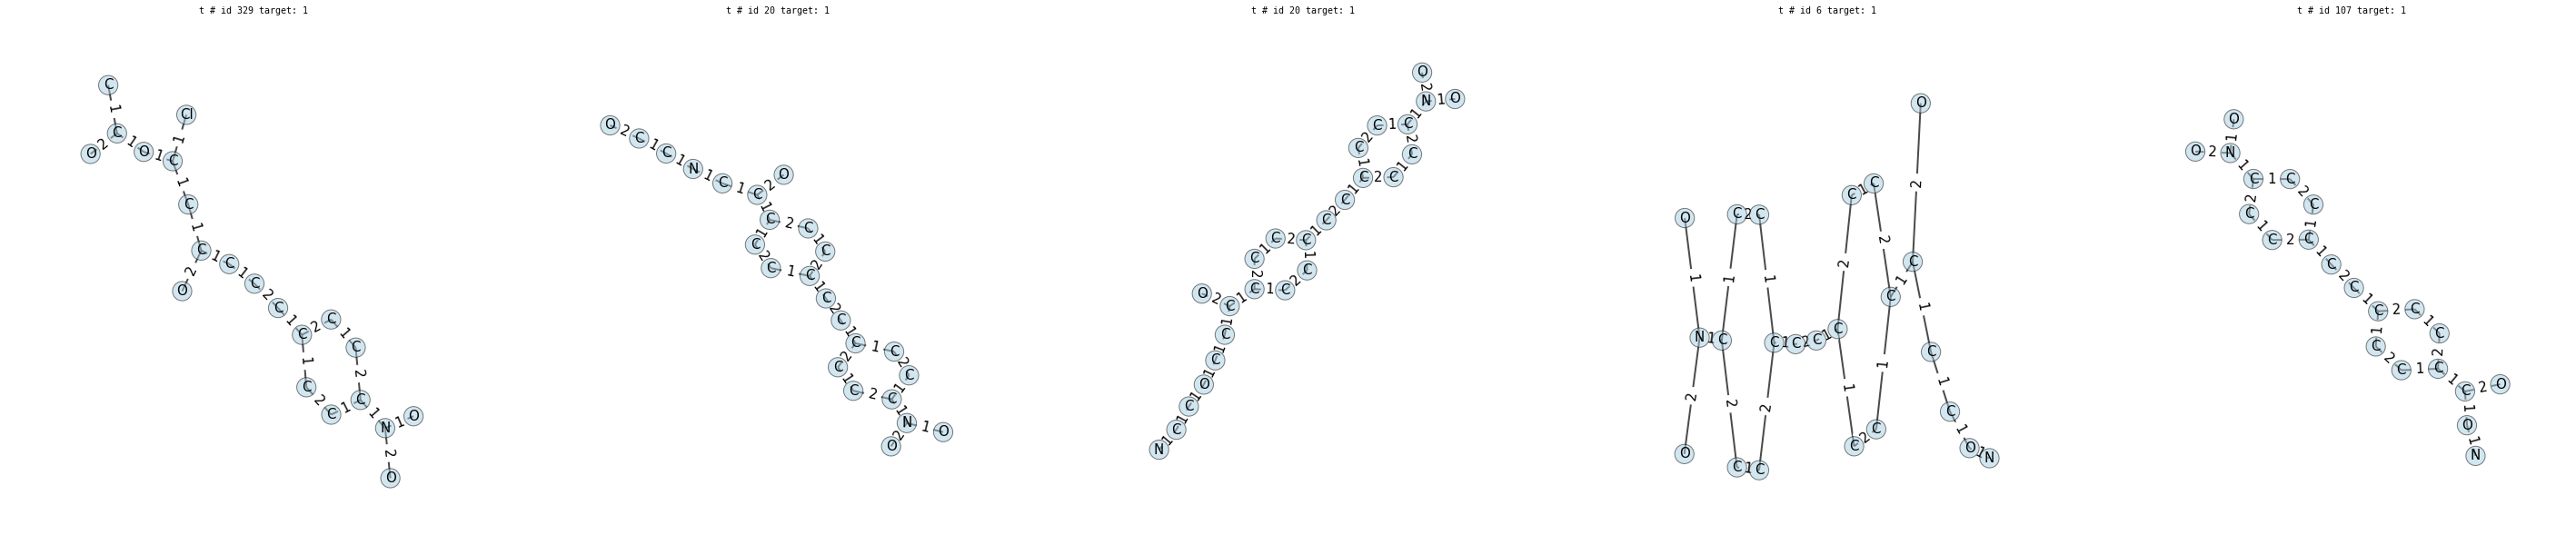

_propose_graph: iteration 0 ; core 0 of 5 ; original_cips tried  0 ; size 32
_propose_graph: iteration 1 ; core 0 of 2 ; original_cips tried  0 ; size 30
_propose_graph: iteration 2 ; core 0 of 3 ; original_cips tried  0 ; size 32
_propose_graph: iteration 3 ; core 0 of 5 ; original_cips tried  0 ; size 40
_propose_graph: iteration 4 ; core 0 of 3 ; original_cips tried  0 ; size 42
_propose_graph: iteration 5 ; core 0 of 3 ; original_cips tried  0 ; size 42
_propose_graph: iteration 6 ; core 0 of 1 ; original_cips tried  0 ; size 44
_propose_graph: iteration 7 ; core 0 of 1 ; original_cips tried  0 ; size 36
_propose_graph: iteration 8 ; core 0 of 3 ; original_cips tried  0 ; size 34
_propose_graph: iteration 9 ; core 0 of 1 ; original_cips tried  0 ; size 34
_propose_graph: iteration 10 ; core 0 of 4 ; original_cips tried  0 ; size 36
_propose_graph: iteration 11 ; core 0 of 22 ; original_cips tried  0 ; size 43
_propose_graph: iteration 12 ; core 0 of 22 ; original_cips tried  0 ; si

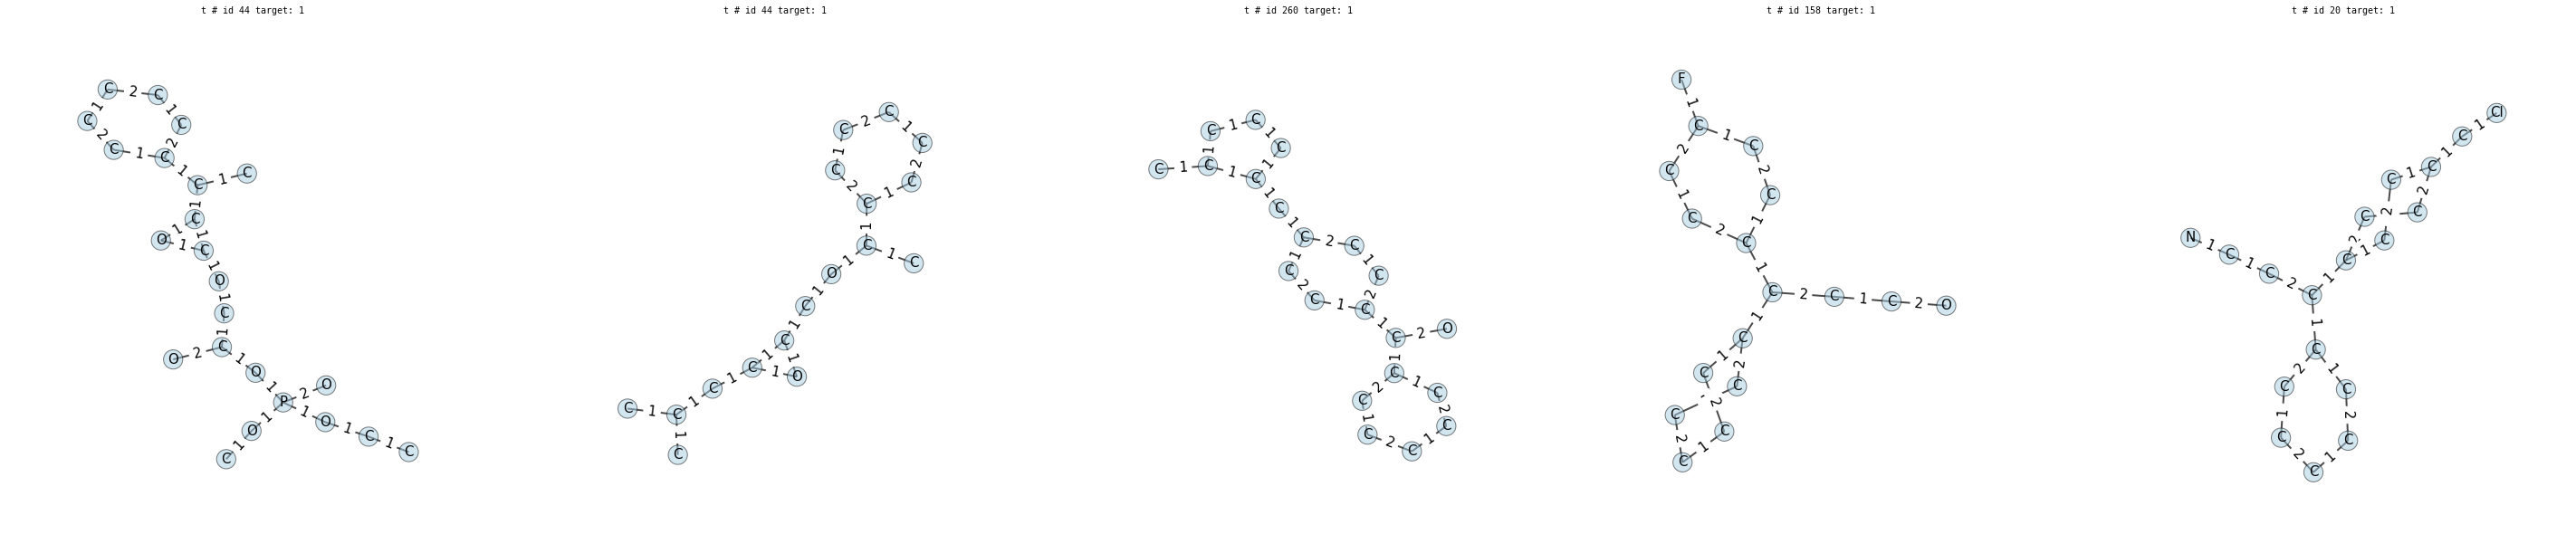

_propose_graph: iteration 0 ; core 0 of 14 ; original_cips tried  0 ; size 20
_propose_graph: iteration 1 ; core 0 of 14 ; original_cips tried  0 ; size 13
_propose_graph: iteration 2 ; core 0 of 14 ; original_cips tried  0 ; size 13
_propose_graph: iteration 3 ; core 0 of 22 ; original_cips tried  0 ; size 24
_propose_graph: iteration 4 ; core 0 of 14 ; original_cips tried  0 ; size 28
_propose_graph: iteration 5 ; core 0 of 22 ; original_cips tried  0 ; size 13
_propose_graph: iteration 6 ; core 0 of 4 ; original_cips tried  0 ; size 13
_propose_graph: iteration 7 ; core 0 of 14 ; original_cips tried  0 ; size 17
_propose_graph: iteration 8 ; core 0 of 4 ; original_cips tried  0 ; size 17
_propose_graph: iteration 9 ; core 0 of 14 ; original_cips tried  0 ; size 17
_propose_graph: iteration 10 ; core 0 of 14 ; original_cips tried  0 ; size 17
_propose_graph: iteration 11 ; core 0 of 14 ; original_cips tried  0 ; size 17
_propose_graph: iteration 12 ; core 0 of 4 ; original_cips tried

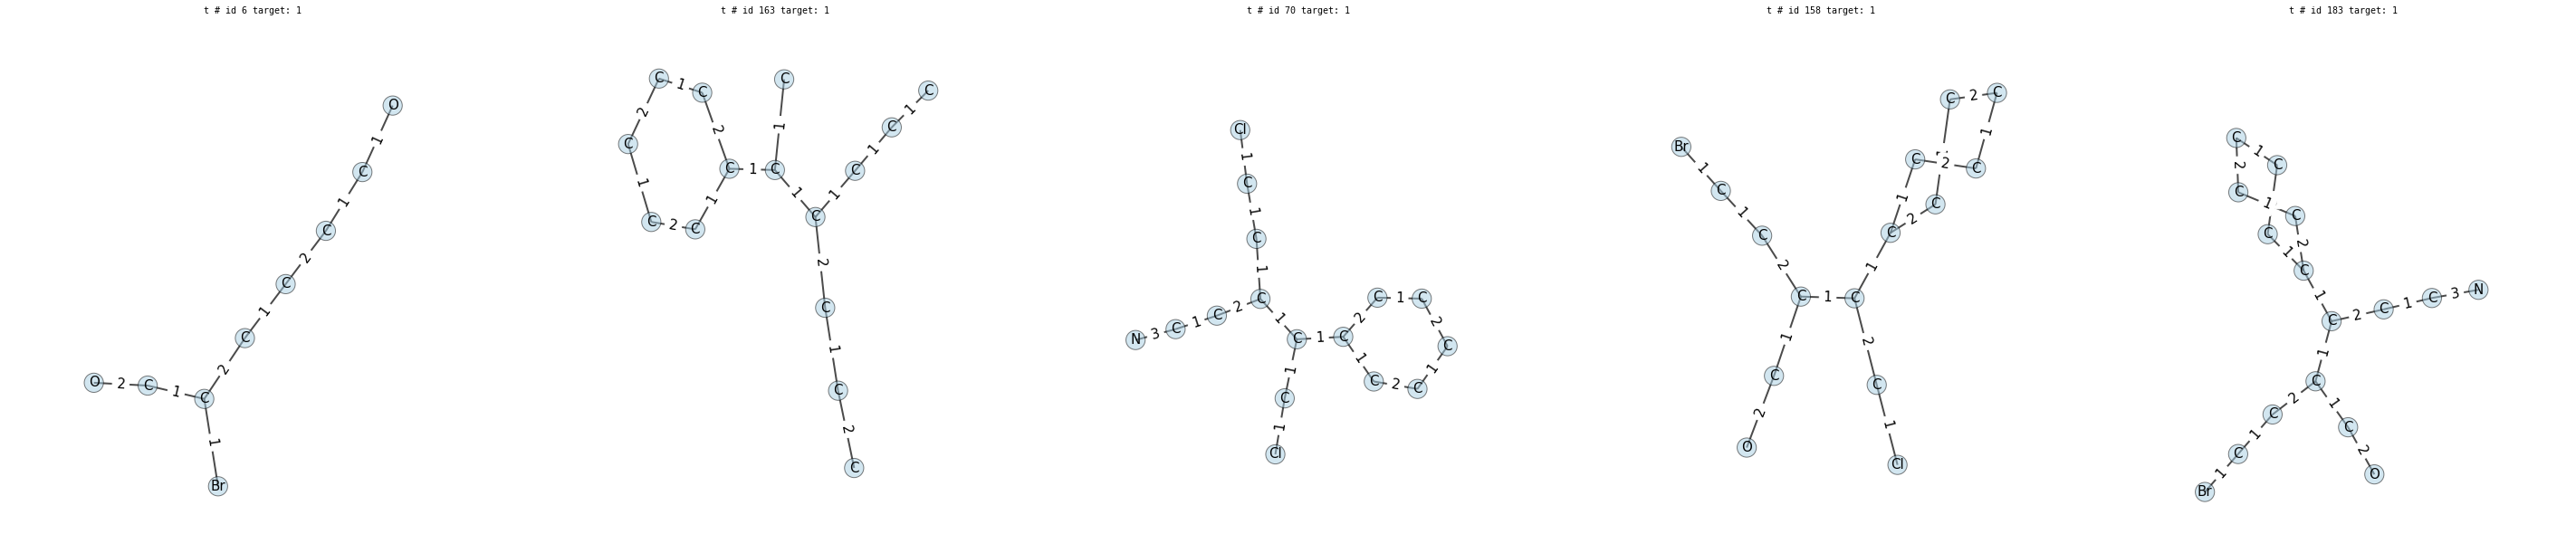

CPU times: user 31.2 s, sys: 764 ms, total: 32 s
Wall time: 32.8 s


In [23]:
%%time
import graphlearn.utils.draw as draw
from graphlearn.utils import openbabel
import graphlearn.abstract_graphs.mole.circletransform as mole
import itertools

# parameters
graphs = get_graphs()
id_start=15
id_end=id_start+9
graphs = itertools.islice(graphs,id_start,id_end)
n_steps=100


#sampling
graphs = sampler.sample(graphs,
                        n_samples=5,
                        batch_size=1,
                        n_steps=n_steps,
                        n_jobs=1,
                        quick_skip_orig_cip=True,
                        probabilistic_core_choice=False,
                        burnin=0,
                        improving_threshold=0.5,
                        max_size_diff=10,
                        select_cip_max_tries=100,
                        keep_duplicates=True,
                        include_seed=True)

 
scores=[]
ids=range(id_start,id_end)
for i,path_graphs in enumerate(graphs):
    # path_graphs is a list of 'sampled' graphs for 1 run 
    print 'Graph id: %d'%(ids[i])
    #save score
    scores.append(sampler.monitors[i].sampling_info['score_history'])
    # draw
    if debug:
        draw.graphlearn(path_graphs,
                           n_graphs_per_line=5, size=10, 
                           colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='color_level',
                           vertex_alpha=0.5, edge_alpha=0.7, node_size=450,edge_label='label'  )
    else:
        openbabel.draw(path_graphs)

## show score history for each samplerun

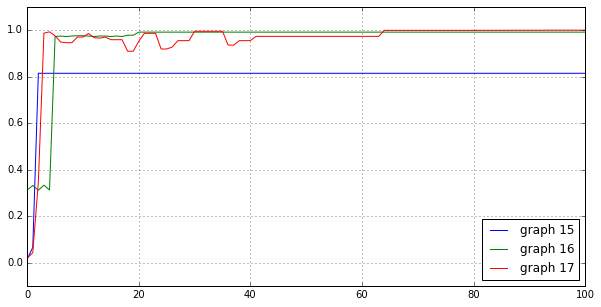

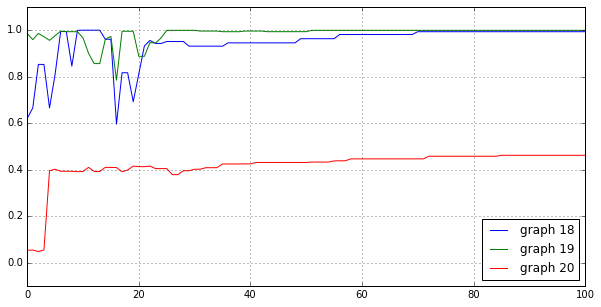

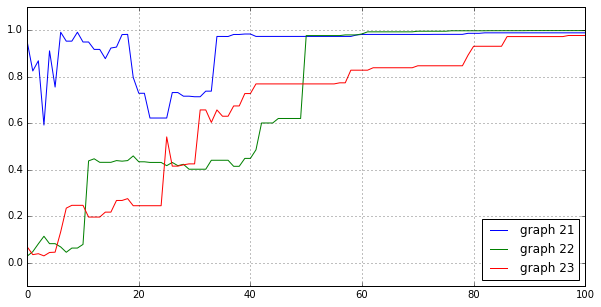

In [24]:
%matplotlib inline
from itertools import islice
import numpy as np
import matplotlib.pyplot as plt
step=1
num_graphs_per_plot=3
num_plots=np.ceil([len(scores)/num_graphs_per_plot])
for i in range(num_plots):
    plt.figure(figsize=(10,5))
    for j,score in enumerate(scores[i*num_graphs_per_plot:i*num_graphs_per_plot+num_graphs_per_plot]):
        data = list(islice(score,None, None, step))
        plt.plot(data, label='graph %d'%(j+i*num_graphs_per_plot+id_start))
    plt.legend(loc='lower right')
    plt.grid()
    plt.ylim(-0.1,1.1)
    plt.show()

---